## 1. Calculate time compexity of two main debt settlement algorithm, depending on the number of transactions (10, 100,... , 10 million)

In [4]:
# First import two main debt_settlement python algorithms in debt_settlment.py 
from debt_settlement import calculate_debts_python_sorted, calculate_debts_merge_sort

import timeit, random 
transaction_size = [10**i for i in range(1,8)]
people = ['Elena','Milton','Minho','Camilo','Monserrat','Gayatri','Guilia']
runtimes_python_sort = []
runtimes_merge_sort = []
number_of_optimal = []
class Expense:
    def __init__(self, payer, debtors, amount):
        self.payer = payer
        self.debtors = debtors
        self.amount = amount

for size in transaction_size:
    expenses = []
    for i in range(1,size):
        number_of_debtors = random.randint(1,len(people))
        debtors = random.sample(people, number_of_debtors)
        payer = random.choice(people)
        amount = random.randint(500,1000)
        expenses.append(Expense(payer,debtors,amount))
    runtime_python_sort = timeit.timeit(lambda: calculate_debts_python_sorted(expenses), number = 1)
    runtime_merge_sort = timeit.timeit(lambda: calculate_debts_merge_sort(expenses), number = 1)
    time_optimal = len(calculate_debts_merge_sort(expenses))
    number_of_optimal.append(time_optimal)
    runtimes_python_sort.append(runtime_python_sort)
    runtimes_merge_sort.append(runtime_merge_sort)
    

### FYI: From 10 million to 6 transactions

In [5]:
number_of_transactions = 10000000
tenmilion_to_optimal = calculate_debts_merge_sort(expenses)
print(f"We reduce {number_of_transactions} to {len(tenmilion_to_optimal)}")
# This is surpring performance : ) 

We reduce 10000000 to 6


## 2. Visualize comparison of two main algorithms

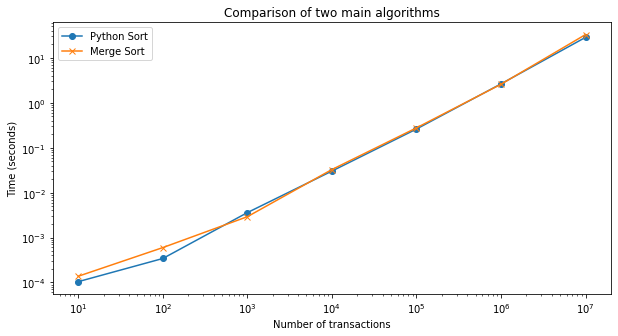

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(transaction_size, runtimes_python_sort, label='Python Sort', marker='o')
plt.plot(transaction_size, runtimes_merge_sort, label='Merge Sort', marker='x')
plt.xscale('log')
plt.yscale('log')
plt.title('Comparison of two main algorithms')
plt.xlabel('Number of transactions')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

## 3. Visualize comparison of two main algorithms with Brute Force

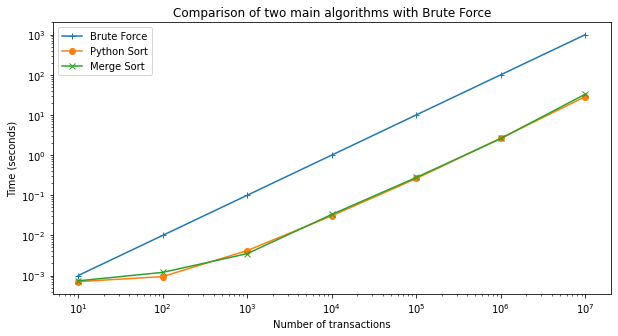

In [7]:
# We assume that each transaction spend 0.0001 seconds. 
transaction_time = 0.0001
runtimes_brute_force = [transaction_time * x for x in transaction_size]
time_of_optimal_transaction = [transaction_time * x for x in number_of_optimal]
runtimes_python_sort_total = [x + y for x,y in zip(time_of_optimal_transaction, runtimes_python_sort)]
runtimes_merge_sort_total = [x + y for x,y in zip(time_of_optimal_transaction, runtimes_merge_sort)]

# Below is the 
plt.figure(figsize=(10, 5))
plt.plot(transaction_size, runtimes_brute_force, label='Brute Force', marker = '+')
plt.plot(transaction_size, runtimes_python_sort_total, label='Python Sort', marker='o')
plt.plot(transaction_size, runtimes_merge_sort_total, label='Merge Sort', marker='x')
plt.xscale('log')
plt.yscale('log')
plt.title('Comparison of two main algorithms with Brute Force')
plt.xlabel('Number of transactions')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()
